In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_stata("h243.dta")

df = pd.DataFrame(data)

# List of variables to use
columns_to_keep = [
    'REGION22', 'FAMS1231', 'RXEXP22', 'CANCERDX', 'UNINS22', 
    'PRVEV22', 'MCDEV22', 'MCREV22', 'HOUR53', 'EMPST53', 
    'FAMINC22', 'HIDEG', 'MARRY22X', 'RACEV1X', 'SEX', 'AGELAST', 'TOTSLF22'
]

df = df[columns_to_keep]


# mapping old column names to new readable ones
column_name_mapping = {
    'REGION22': 'Region',
    'FAMS1231': 'Family Size',
    'RXEXP22': 'Prescription Cost Spent',
    'CANCERDX': 'Cancer Diagnosis',
    'UNINS22': 'Uninsured',
    'PRVEV22': 'Private Insurance',
    'MCDEV22': 'Medicaid Status',
    'MCREV22': 'Medicare Status',
    'HOUR53': 'Hours Worked',
    'EMPST53': 'Employment Status',
    'FAMINC22': 'Family Income',
    'HIDEG': 'Highest Degree',
    'MARRY22X': 'Marital Status',
    'RACEV1X': 'Race',
    'SEX': 'Sex',
    'AGELAST': 'Age',
    'TOTSLF22': 'Out of Pocket Cost'
}

# Rename the columns in the DataFrame
df.rename(columns=column_name_mapping, inplace=True)

# Check the new column names
print(df.columns)


#Converted column Sex formated 1 MALE into MALE, 2 FEMALE into FEMALE:
df['Sex'] = df['Sex'].str.split().str[1]
df['Sex']


# Simplify column vals to one word race categories
def simplify_race(race):
    if "WHITE" in race:
        return "WHITE"
    elif "BLACK" in race:
        return "BLACK"
    elif "AMER INDIAN" in race or "ALASKA NATIVE" in race:
        return "AMER INDIAN/ALASKA NATIVE"
    elif "ASIAN" in race or "NATV HAWAIIAN" in race or "PACFC ISL" in race:
        return "ASIAN"
    elif "MULTIPLE" in race:
        return "MULTIPLE"
    else:
        return "UNKNOWN"

df["Race"] = df["Race"].apply(simplify_race)


df['Marital Status'] = df['Marital Status'].replace({
    '2 WIDOWED': 'WIDOWED',
    '3 DIVORCED': 'DIVORCED',
    '5 NEVER MARRIED': 'NEVER MARRIED',
    '6 UNDER AGE 16 - INAPPLICABLE': 'UNDER AGE 16',
    '1 MARRIED': 'MARRIED',
    '4 SEPARATED': 'SEPARATED',
    '-7 REFUSED': 'REFUSED',
    '-8 DON\'T KNOW': 'DON\'T KNOW'
})



df['Highest Degree'] = df['Highest Degree'].replace({
    '1 NO DEGREE': 'NO DEGREE',
    '7 OTHER DEGREE': 'OTHER DEGREE',
    '5 MASTER\'S DEGREE': 'MASTER\'S DEGREE',
    '4 BACHELOR\'S DEGREE': 'BACHELOR\'S DEGREE',
    '8 UNDER AGE 16 - INAPPLICABLE': 'UNDER AGE 16',
    '3 HIGH SCHOOL DIPLOMA': 'HIGH SCHOOL DIPLOMA',
    '2 GED': 'GED',
    '6 DOCTORATE DEGREE': 'DOCTORATE DEGREE',
    '-8 DON\'T KNOW': 'DON\'T KNOW',
    '-7 REFUSED': 'REFUSED'
})


df['Employment Status'] = df['Employment Status'].replace({
    '4 NOT EMPLOYED DURING RD 5/3': 'NOT EMPLOYED',
    '3 JOB DURING RD 5/3 REF PERIOD': 'JOB DURING REF',
    '1 EMPLOYED AT RD 5/3 INT DATE': 'EMPLOYED',
    '-1 INAPPLICABLE': 'INAPPLICABLE',
    '2 JOB TO RETURN TO AT RD 5/3 INT DATE': 'HAS JOB TO RETURN',
    '-7 REFUSED': 'REFUSED',
    '-15 CANNOT BE COMPUTED': 'CANNOT COMPUTE',
    '-8 DON\'T KNOW': 'DON\'T KNOW'
})

#Yes or No values:
df["Medicare Status"] = df["Medicare Status"].str.split().str[1]
df["Medicaid Status"] = df["Medicaid Status"].str.split().str[1]
df["Private Insurance"] = df["Private Insurance"].str.split().str[1]
df["Uninsured"] = df["Uninsured"].str.split().str[1]
df["Cancer Diagnosis"] = df["Cancer Diagnosis"].str.split().str[1]

#FAMILY SIZE COLUMN = NUMERICAL
df['Family Size'] = df['Family Size'].replace({
    '-1 INAPPLICABLE': None,  
    '1 PERSON': 1,
    '2 PERSONS': 2,
    '3 PERSONS': 3,
    '4 PERSONS': 4,
    '5 PERSONS': 5,
    '6 PERSONS': 6,
    '7 PERSONS': 7,
    '8 PERSONS': 8,
    '9 PERSONS': 9,
    '10 PERSONS': 10,
    '11 PERSONS': 11,
    '14 PERSONS': 14
})
df['Family Size'] = pd.to_numeric(df['Family Size'], errors='coerce')

#convert hours53 into numerical; replace invalid values as nan:
invalid_values = ['-15 CANNOT BE COMPUTED', '-8 DON\'T KNOW', '-7 REFUSED', '-2 DETERMINED IN PREVIOUS ROUND']
df['Hours Worked'] = df['Hours Worked'].replace(invalid_values, np.nan)

# Convert the column to numeric (invalid values will become NaN)
df['Hours Worked'] = pd.to_numeric(df['Hours Worked'], errors='coerce')


df['Region'] = df['Region'].replace({
    '-1 INAPPLICABLE': 'INAPPLICABLE',
    '1 NORTHEAST': 'NORTHEAST',
    '2 MIDWEST': 'MIDWEST',
    '3 SOUTH': 'SOUTH',
    '4 WEST': 'WEST'
})



# Convert to numeric (coerce errors to NaN)
df['Prescription Cost Spent'] = pd.to_numeric(df['Prescription Cost Spent'], errors='coerce')

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Out of Pocket Cost'] = pd.to_numeric(df['Out of Pocket Cost'], errors='coerce')





# Select numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()

# Print the names of numerical columns
print(f'Numerical columns: {numeric_cols}')





Index(['Region', 'Family Size', 'Prescription Cost Spent', 'Cancer Diagnosis',
       'Uninsured', 'Private Insurance', 'Medicaid Status', 'Medicare Status',
       'Hours Worked', 'Employment Status', 'Family Income', 'Highest Degree',
       'Marital Status', 'Race', 'Sex', 'Age', 'Out of Pocket Cost'],
      dtype='object')
Numerical columns: ['Family Size', 'Prescription Cost Spent', 'Hours Worked', 'Family Income', 'Out of Pocket Cost']


C:\Users\juesh\AppData\Local\Temp\ipykernel_10484\3635550751.py:71: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Marital Status'] = df['Marital Status'].replace({
C:\Users\juesh\AppData\Local\Temp\ipykernel_10484\3635550751.py:84: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Highest Degree'] = df['Highest Degree'].replace({
C:\Users\juesh\AppData\Local\Temp\ipykernel_10484\3635550751.py:98: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases th

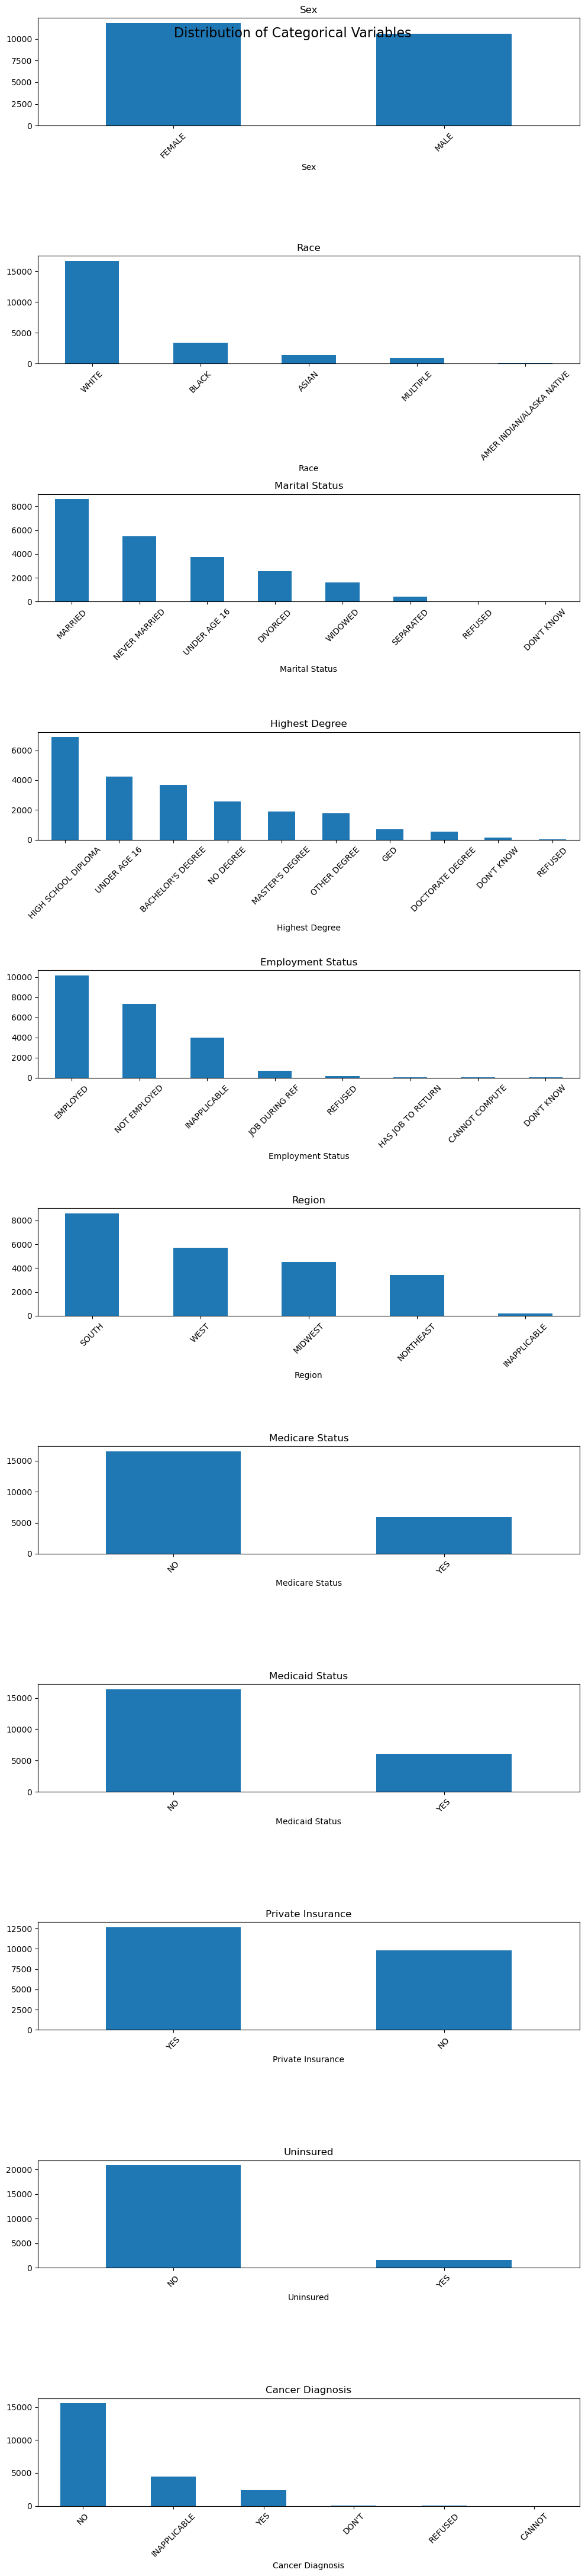

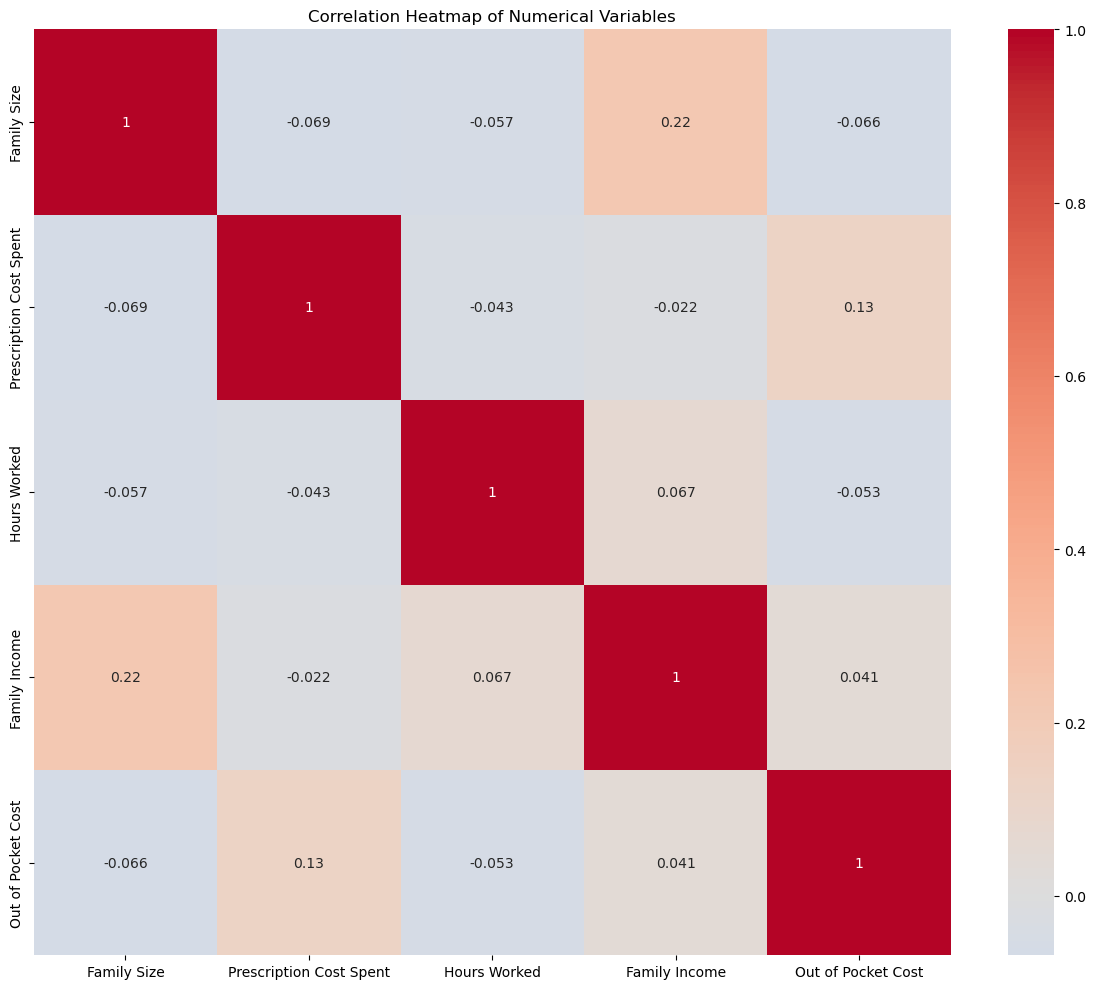

C:\Users\juesh\AppData\Local\Temp\ipykernel_10484\2763845779.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Out of Pocket Cost', data=df, ax=axes[i], ci=None)
C:\Users\juesh\AppData\Local\Temp\ipykernel_10484\2763845779.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Out of Pocket Cost', data=df, ax=axes[i], ci=None)
C:\Users\juesh\AppData\Local\Temp\ipykernel_10484\2763845779.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Out of Pocket Cost', data=df, ax=axes[i], ci=None)
C:\Users\juesh\AppData\Local\Temp\ipykernel_10484\2763845779.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Out of Pocket Cost', data=df, ax=axes[i], ci=None)
C:\Users\juesh\AppData\Local\Temp\ipykernel_10484\276384

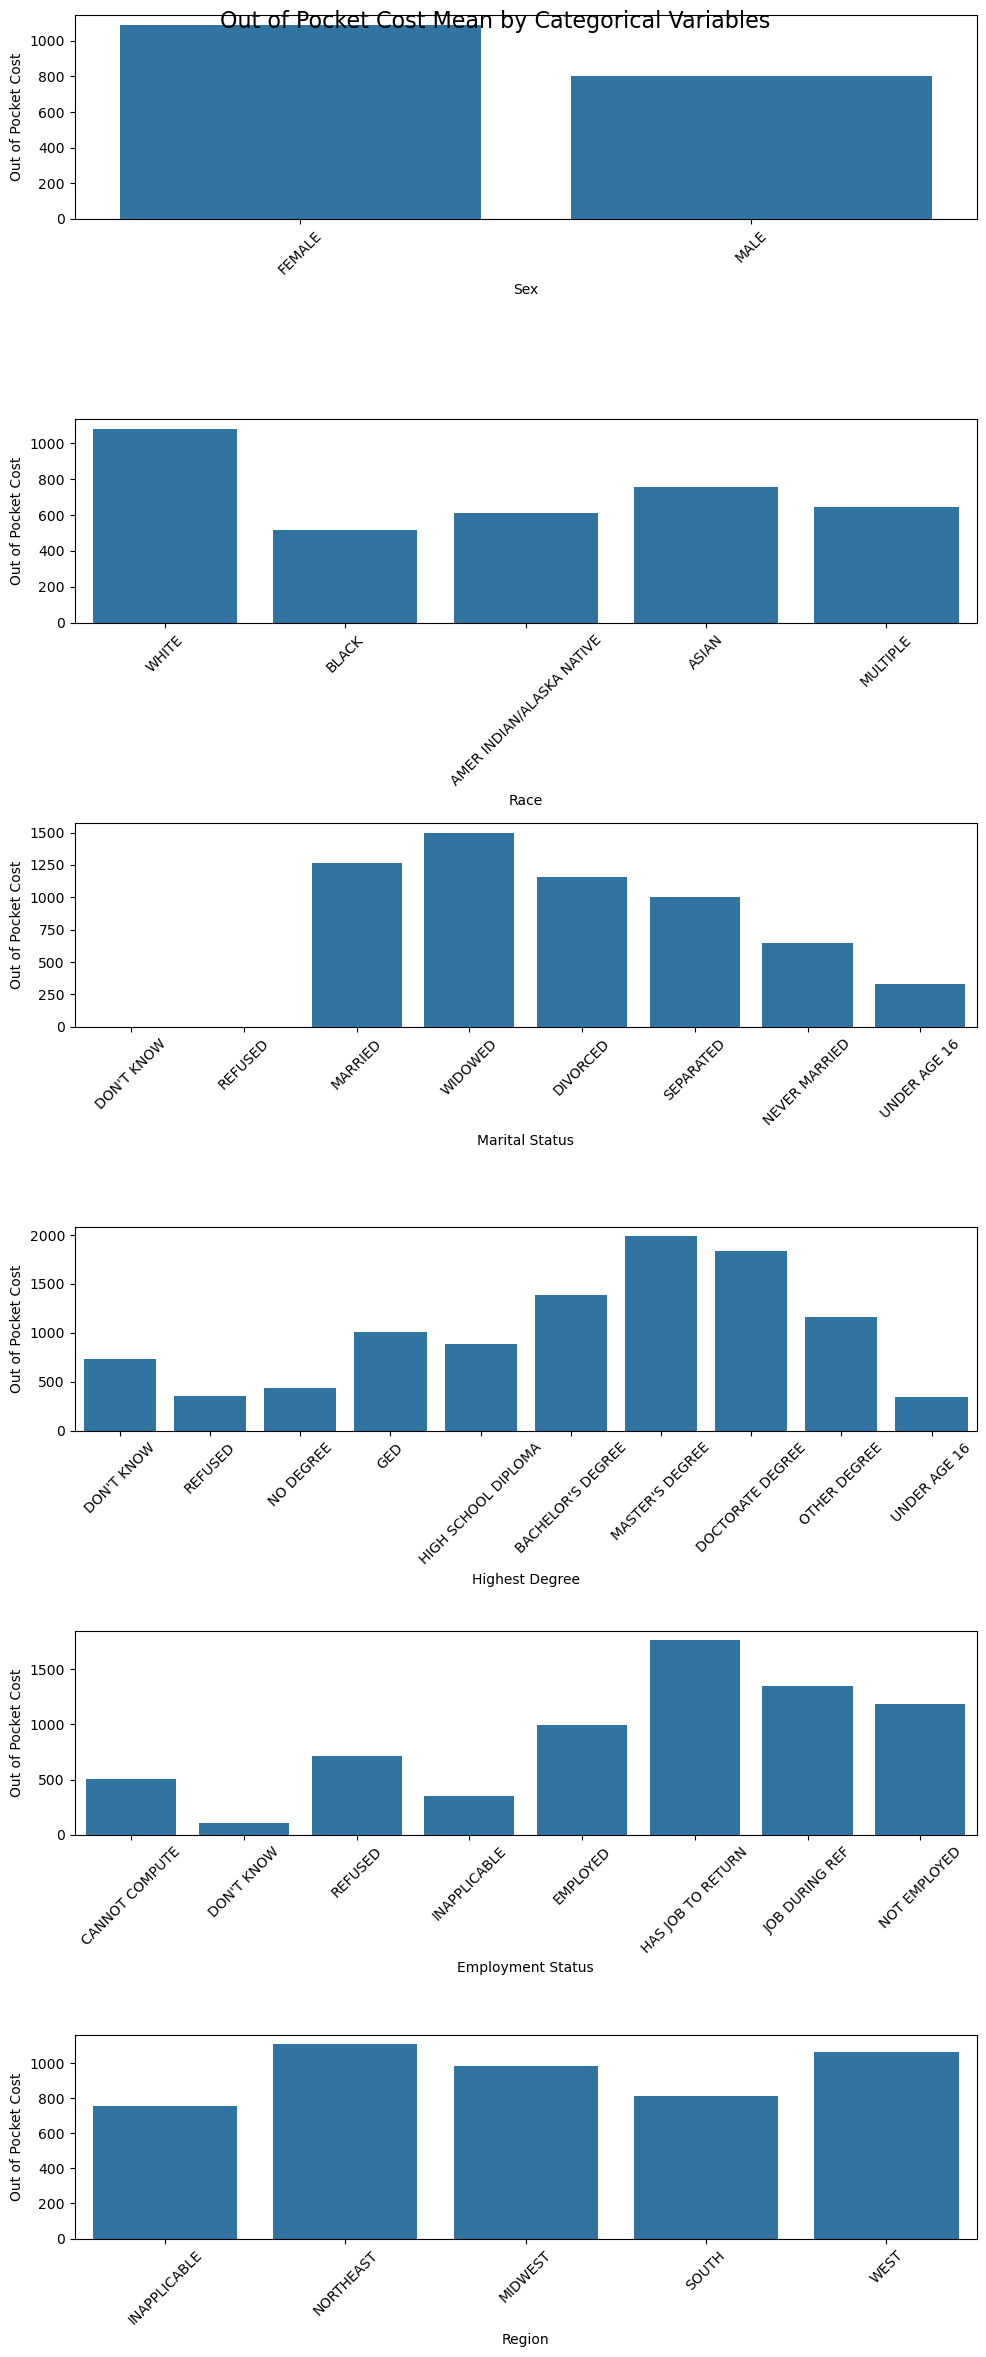

In [9]:
# Categorical Variables Distribution
def plot_categorical_distributions(df):
    categorical_cols = ['Sex', 'Race', 'Marital Status', 'Highest Degree', 'Employment Status', 'Region', 'Medicare Status', 'Medicaid Status', 'Private Insurance', 'Uninsured', 'Cancer Diagnosis']
    
    fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 4*len(categorical_cols)))
    fig.suptitle('Distribution of Categorical Variables', fontsize=16)
    
    for i, col in enumerate(categorical_cols):
        df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df)



# Numerical Variables Correlation Heatmap
def plot_correlation_heatmap(df):
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(df)


def plot_barplots(df):
    categorical_cols = ['Sex', 'Race', 'Marital Status', 'Highest Degree', 'Employment Status', 'Region']
    
    fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 4*len(categorical_cols)))
    fig.suptitle('Out of Pocket Cost Mean by Categorical Variables', fontsize=16)
    
    for i, col in enumerate(categorical_cols):
        sns.barplot(x=col, y='Out of Pocket Cost', data=df, ax=axes[i], ci=None)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_barplots(df)



In [10]:
#ONE HOT ENCODING 

categorical_columns = [
    'Region', 'Marital Status', 'Sex', 'Race', 'Highest Degree', 
    'Employment Status', 'Medicare Status', 'Medicaid Status', 'Private Insurance', 'Uninsured', 'Cancer Diagnosis'
]

df[categorical_columns] = df[categorical_columns].astype('category')

df = pd.get_dummies(df, columns=categorical_columns)

print(df)



       Family Size  Prescription Cost Spent  Hours Worked  Family Income  Age  \
0              1.0                     1602           NaN          22000   77   
1              2.0                     1442           NaN           5000   64   
2              2.0                       20           NaN          30740   67   
3              1.0                     6292           NaN         106483   29   
4              1.0                      252           NaN          45000   51   
...            ...                      ...           ...            ...  ...   
22426          2.0                      803           NaN          58720   85   
22427          2.0                      311           NaN          58720   85   
22428          1.0                      316           NaN          15008   62   
22429          1.0                      998           NaN          37819   65   
22430          1.0                     2061           NaN          10884   85   

       Out of Pocket Cost  